# Explore here

In [1]:
import pandas as pd
import urllib.request
import ssl

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# escalado
from sklearn.preprocessing import StandardScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#modelar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, recall_score


In [2]:

# Cargamos el Dataset y lo guardamos en raw para poderlo leer:

from ssl import _create_unverified_context

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())
df=pd.read_csv(ssl_context, index_col=None, delimiter=";")

df.to_csv ("/Users/nataliagarciavila/Desktop/4 GEEKS ACADEMY/CLASES_EJERCICIOS_/CLASES_EJERCICIOS_/EJERCICIOS/CLASE EJERCICOS 17/machine-learning-python-template/data/raw/data.csv")

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital

df.shape

(41188, 21)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Utilizamos el método 'isna' para conocer cuántos valores nulos hay por columna:

total_nans = df.isna().sum()
total_nans

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#Usamos el método duplicated() para detectar duplicados en un DataFrame y sum() para contar el número de duplicados.

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

En este caso como todos los datos son relevantes para la campaña de marketing,no consideramos el hecho de eliminar ningún dato.

In [7]:
# Creamos una lista de arrays con las columnas indicadas:
columns_to_filter = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Eliminamos las filas donde cualquier columna en 'columnas_a_filtrar' tiene el valor 'unknown':

for columna in columns_to_filter:
    df = df[df[columna] != 'unknown']

print(df)


       age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
6       59       admin.  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previ

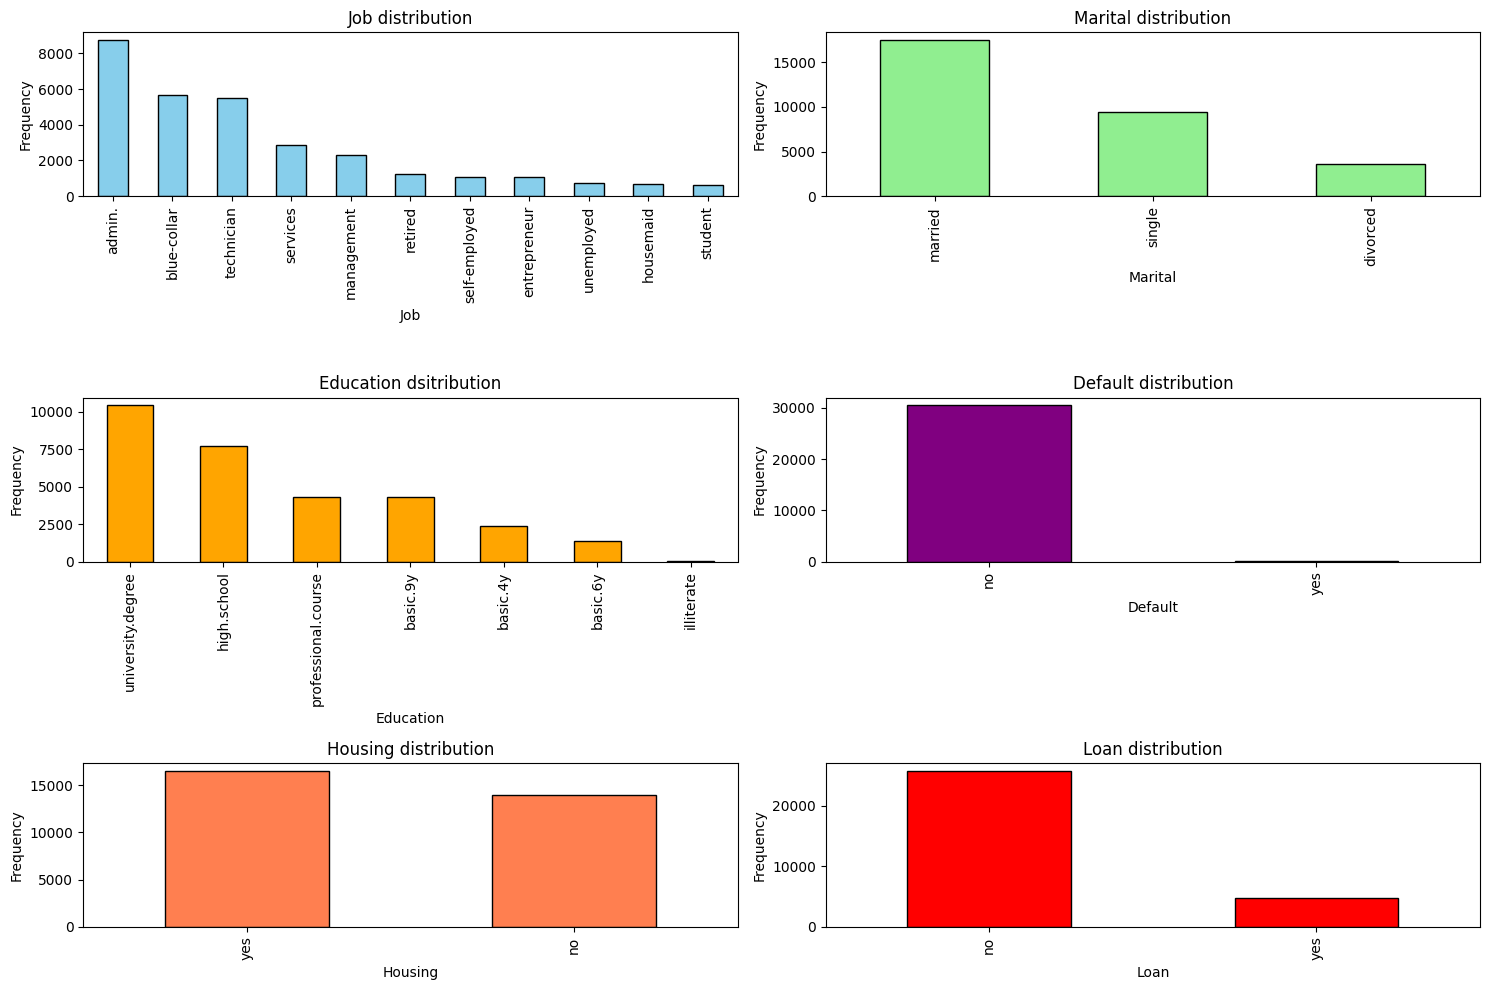

In [8]:
# Vamos a definir las variantes tanto categóricas como univariantes. Primero empezaremos analizando las categóricas:

fig, axes = plt.subplots(3 ,2, figsize=(15, 10))

# Bar plot para "job"
df["job"].value_counts().plot(kind= "bar", ax=axes[0,0], color="skyblue", edgecolor="k")

axes[0,0].set_title('Job distribution')
axes[0,0].set_xlabel('Job')
axes[0,0].set_ylabel('Frequency')

# Bar plot para "marital"
df["marital"].value_counts().plot(kind= "bar", ax=axes[0,1], color="lightgreen", edgecolor="k")

axes[0,1].set_title('Marital distribution')
axes[0,1].set_xlabel('Marital')
axes[0,1].set_ylabel('Frequency')

# Bar plot para "education"
df["education"].value_counts().plot(kind= "bar", ax=axes[1,0], color="orange", edgecolor="k")

axes[1,0].set_title('Education dsitribution')
axes[1,0].set_xlabel('Education')
axes[1,0].set_ylabel('Frequency')

# Bar plot para "default"
df["default"].value_counts().plot(kind= "bar", ax=axes[1,1], color="purple", edgecolor="k")

axes[1,1].set_title('Default distribution')
axes[1,1].set_xlabel('Default')
axes[1,1].set_ylabel('Frequency')

# Bar plot para "housing"
df["housing"].value_counts().plot(kind= "bar", ax=axes[2,0], color="coral", edgecolor="k")

axes[2,0].set_title('Housing distribution')
axes[2,0].set_xlabel('Housing')
axes[2,0].set_ylabel('Frequency')

# Bar plot para "loan"
df["loan"].value_counts().plot(kind= "bar", ax=axes[2,1], color="red", edgecolor="k")

axes[2,1].set_title('Loan distribution')
axes[2,1].set_xlabel('Loan')
axes[2,1].set_ylabel('Frequency')


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


A través de estaa gráficas podemos sacar las siguientes conclusiones:

- Job Distribution: Aproximadamente unos 9000 clientes del banco se dedican al campo administrativo, unos 5.500 en el campo técnico y unos 5.400 aprox. "blue collar" (construcción)

- Marital Distribution: Hay un mayor número de clientes casados, siendo este número de 17.000 aprox.

- Education Distribution: Aproximadamente, 11000 clientes con carrera universitaria y unos 7.500 han acabado el instituto.

- Default Distribution: Hay un porcentaje ínfimo de clientes con deuda, siendo casi unos 30.000 clientes sin deuda.

- Housing distribution: Hay aproximadamente unos 16000 clientes con préstamo hipotecario.

- Loan Distribution: Aproximadamente unos 27.000 cliente no tienen préstamo personal (loan) frente a unos 3.000 que sí lo tendrían.



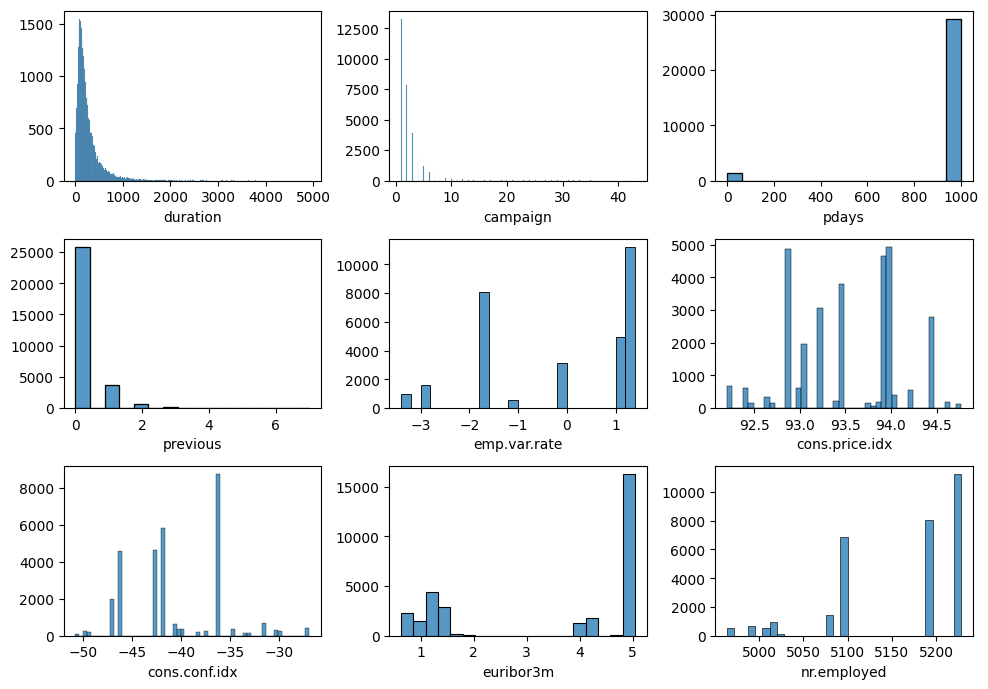

In [9]:
# Vamos a definir las variantes univariantes numéricas:

import matplotlib.pyplot as plt 
import seaborn as sns

#fig, axis = plt.subplots(3, 3, figsize = (10, 7))
fig, axis = plt.subplots(3,3, figsize = (10, 7), gridspec_kw={'height_ratios': [2,2,2]})

# Crear un histograma múltiple

sns.histplot(ax = axis[0, 0], data = df, x = "duration").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "campaign").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "pdays").set(ylabel = None)

sns.histplot(ax = axis[1, 0], data = df, x = "previous").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "emp.var.rate").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "cons.price.idx").set(ylabel = None)

sns.histplot(ax = axis[2, 0], data = df, x = "cons.conf.idx").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "euribor3m").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "nr.employed").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

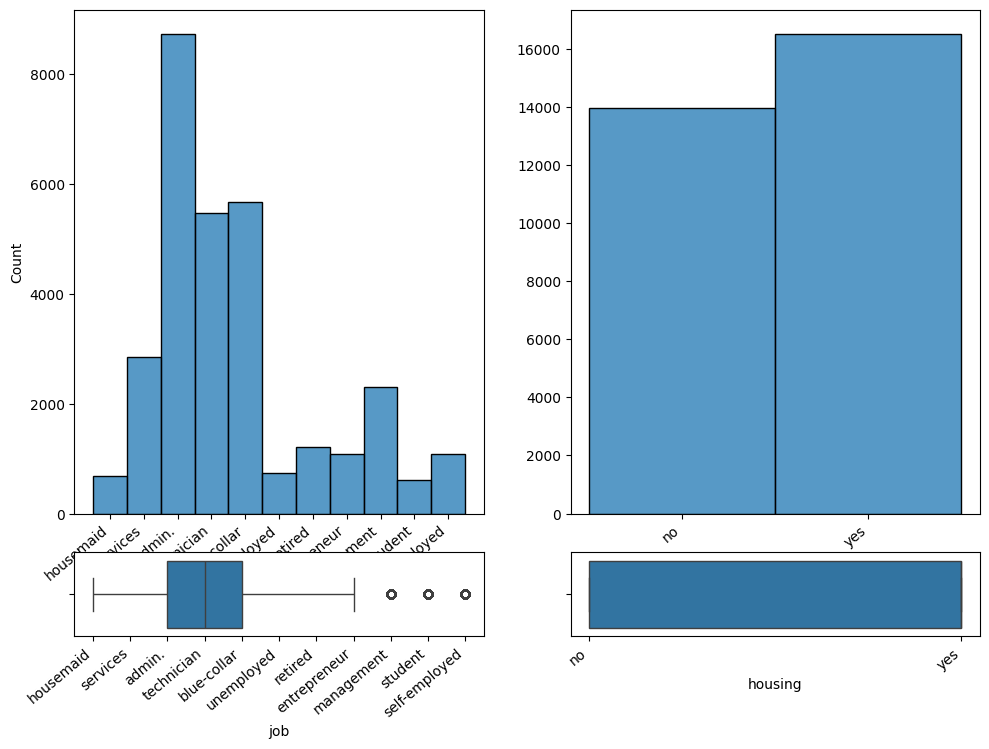

In [10]:
# Vamos a definir las variantes de job con housing:

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "job").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "job")
sns.histplot(ax = axis[0, 1], data = df, x = "housing").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "housing")

# Ajustar el layout
plt.tight_layout()

for ax in axis.flat:
    plt.sca(ax)
    plt.xticks(rotation=40,ha="right")
    
# Mostrar el plot
plt.show()

Como podemos observar en la primera gráfica, unos aproximadamente 9.000 clientes se dedican al sector administrativo, seguidos de unos 6.700 clientes que se dedican al "collar blue" (construcción, peones de obra, etc) y por último, unos 6.400 aprox. que trabajan en la rama técnica.

Estos serían los 3 sectores a los que se dedican la mayoría de los clientes de los cuales, unos 16.100 aprox. tienen contratada una hipoteca.

CHECK FOR UNIQUE JOBS


In [11]:
print(f"uniquejob:{len(df['job'].unique())}")

uniquejob:11


<Axes: xlabel='marital', ylabel='job'>

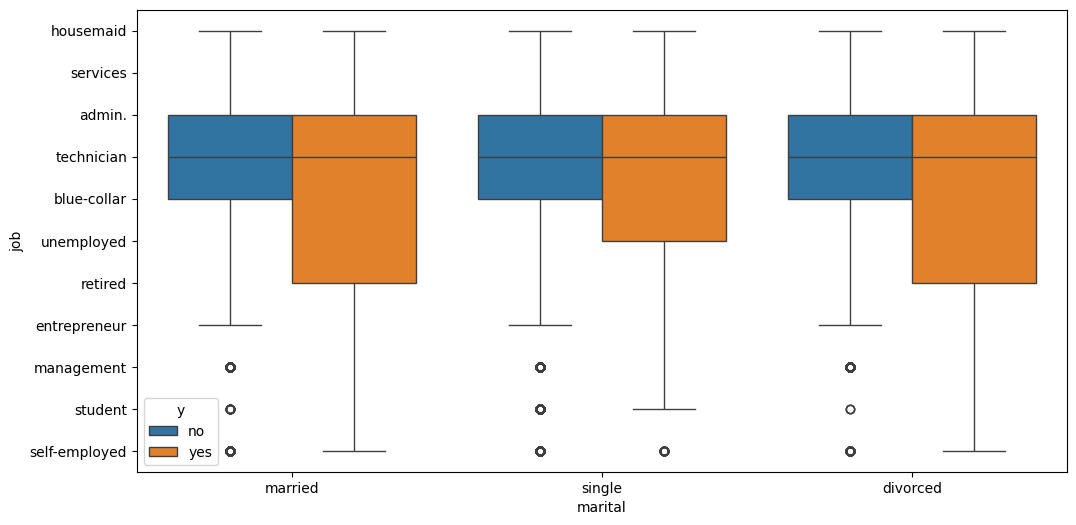

In [12]:
#Vamos a analizar la distribución de en función de la educación y la deuda

plt.figure(figsize=(12,6))
sns.boxplot(x='marital', y='job',hue='y', data=df)

Como se muestran en las barras de la gráfica, los clientes que se dedican a la rama técnica, administrativa o "blue collar" son los que más préstamos a largo plazo tienen contratados.

Podemos observar claramente como la media de los clientes que se dedican a una rama técnica y que estan casados, son los que suelen pedir un crédito a largo plazo, seguidamente por los "blue collar", "unemployed" y jubilados.

De igual manera pasa con los clientes que se encuentran en esta situación laboral pero, están separados. 

Dados estos datos podemos concluir que:

- Técnicos y casados son los que más préstamos tienen o piden
- Es más probable que las personas casadas o divorciadas con un trabajo que requiera de estudios universitarios o grado medio, tendrá más probabilidades de pedir un préstamo.

<Axes: xlabel='job', ylabel='age'>

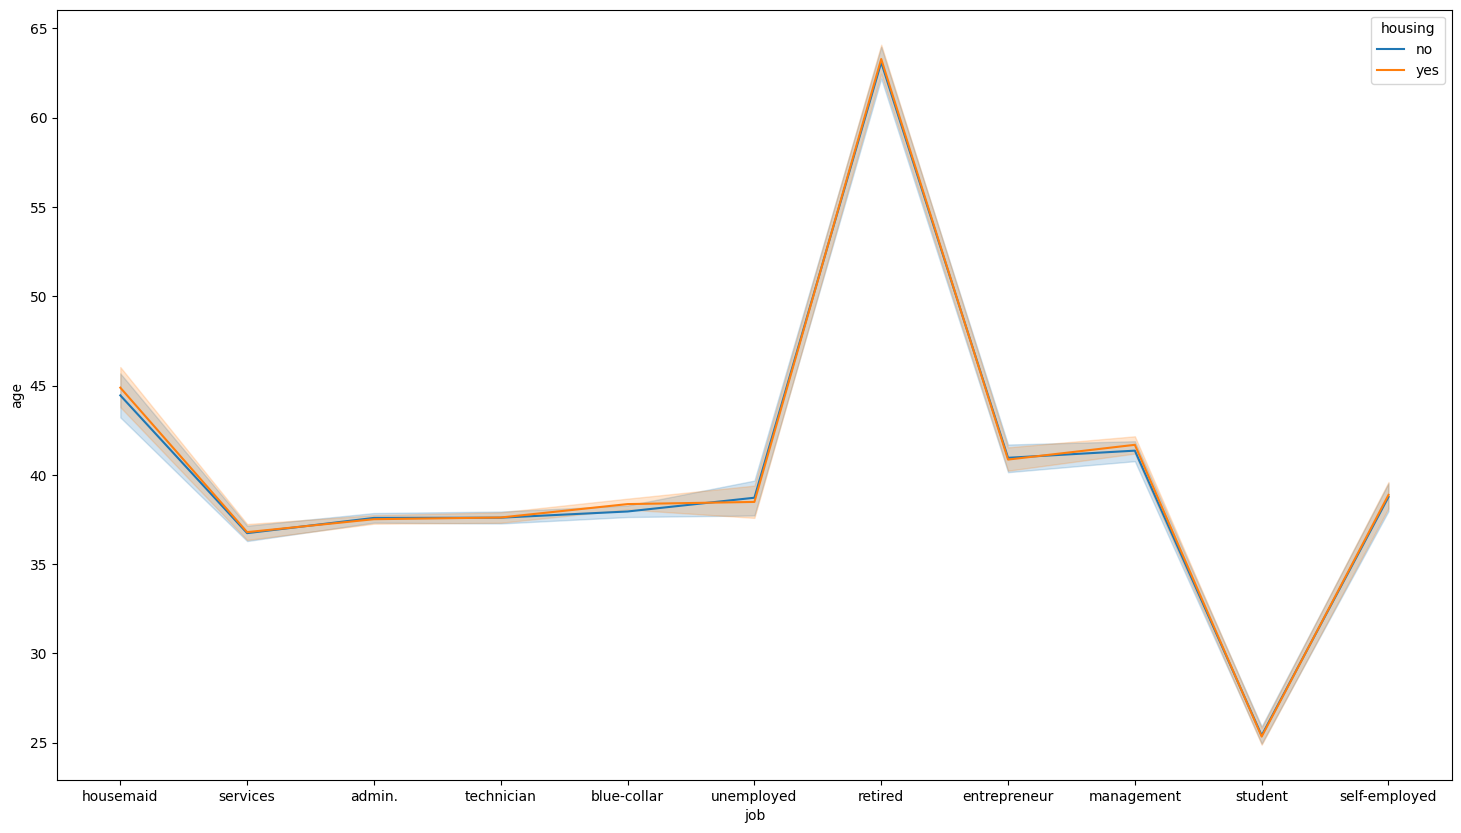

In [13]:
#Aquí mostramos la cantidad de clientes que siguen pagando una hipoteca (housing)
plt.figure(figsize=(18,10))
sns.lineplot(y='age', x='job', data= df, hue='housing')


En esta gráfica podemos observar que el pico más alto de clientes que tienen una hipoteca están retirados/jubilados y que rondan los 65 años. 

En contraposición, los estudiantes se encuentran el aspectro opuesto, y que tienen una media de 25 años.

Esto es comprensible ya que la mayoría aun se encuentra estudiando  con falta de ingresos, ya que aun no se encuentran con una estabilidad económica.

VALORES ATÍPICOS (OUTLIERS)

In [14]:
# Vamos a ver cuáles son nuestros outliers para que nuestro dataset quede lo más limpio posible.

#El análisis descriptivo es una poderosa herramienta para caracterizar el conjunto de datos:

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


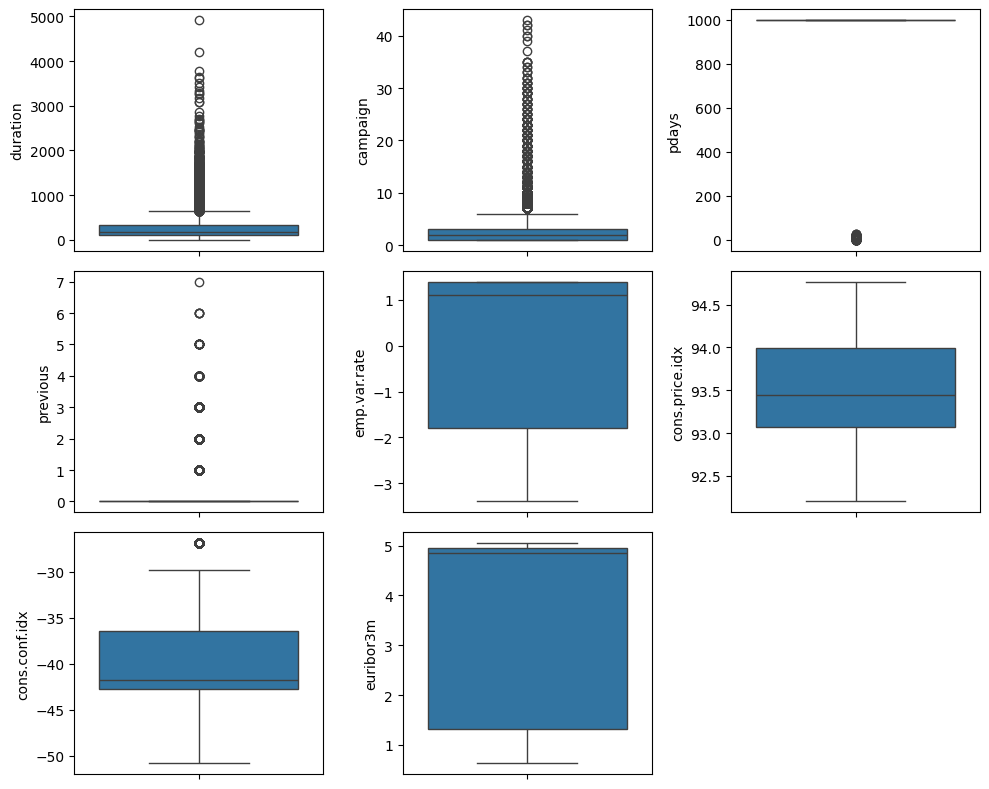

In [15]:
#Dibujar los diagramas de cajas de las variables nos da información poderosa para ver los valores atípicos:

fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "duration")
sns.boxplot(ax = axis[0, 1], data = df, y = "campaign")
sns.boxplot(ax = axis[0, 2], data = df, y = "pdays")
sns.boxplot(ax = axis[1, 0], data = df, y = "previous")
sns.boxplot(ax = axis[1, 1], data = df, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 2], data = df, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 0], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 1], data = df, y = "euribor3m")
sns.boxplot(ax = axis[2, 2], data = df, y = "nr.employed")

fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

Interpretación boxplot box:
Cuadro: representa el rango intercuartil (IQR), donde se encuentra el 50% medio de los valores RMSE. La línea dentro del cuadro muestra la mediana RMSE.
Whiskers: Extender a los valores mínimo y máximo dentro de 1,5 * RIQ de los cuartiles.
Valor atípico: cualquier punto fuera de los "whiskers" se considera un valor atípico. En este gráfico, hay un valor atípico que indica que un pliegue tenía un RMSE 

Vamos a ver qué valores faltantes o nulos tenemos en nuestro Dataset:

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Como vemos que está limpio, pasamos a escalar nuestros datos

SCALING

In [17]:
num_variables=["duration","campaign", "pdays","previous", "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]
df_encoded=df.copy()

In [18]:
#Vamos primero a escalar, codificar y por último modelar.
#-Escalado:

# instancio el escalador
scaler = StandardScaler()

#Entreno y aplico el escalador
df_encoded[num_variables] = scaler.fit_transform(df_encoded[num_variables])
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.559335,0.211887,-0.371616,nonexistent,0.727477,0.804095,0.877451,0.786102,0.401648,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.559335,0.211887,-0.371616,nonexistent,0.727477,0.804095,0.877451,0.786102,0.401648,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.559335,0.211887,-0.371616,nonexistent,0.727477,0.804095,0.877451,0.786102,0.401648,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.559335,0.211887,-0.371616,nonexistent,0.727477,0.804095,0.877451,0.786102,0.401648,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-0.559335,0.211887,-0.371616,nonexistent,0.727477,0.804095,0.877451,0.786102,0.401648,no


CODIFICACIÓN

In [19]:
onehotencoder_variables=["marital","education","default","housing","loan","job"]

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(df_encoded[onehotencoder_variables])

# aplico el encoder en amhos
df_encoded_ohe= onehot_encoder.transform(df_encoded[onehotencoder_variables])
df_encoded_ohe = pd.DataFrame(df_encoded_ohe, index = df_encoded.index, columns=onehot_encoder.get_feature_names_out(onehotencoder_variables))


df_encoded_ohe.head()

,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Unimos los dataframes tras condificar
df_final = pd.concat([df_encoded, df_encoded_ohe], axis=1)

In [21]:
# Codificamos columna a predecir
df_final['y'] = df_final['y'].map({'yes': True, 'no': False})


# Quitamos las columnas donde el datatype es "object"

df_final= df_final.select_dtypes(exclude="object")

In [22]:
# Dividimos el conjunto de datos en muestras de train y test

X = df_final.drop("y", axis = 1)
y = df_final["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
13510,36,-0.456552,-0.559335,0.211887,-0.371616,0.913770,0.674261,-0.438017,0.845747,0.895282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19974,38,2.248733,-0.559335,0.211887,-0.371616,0.913770,-0.135490,0.940092,0.847435,0.895282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32016,51,-0.827191,-0.191702,0.211887,1.541237,-1.073347,-1.076784,-1.168832,-1.200166,-0.821128,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16853,55,-0.479478,-0.559335,0.211887,-0.371616,0.913770,0.674261,-0.438017,0.845184,0.895282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28160,43,-0.112659,-0.559335,0.211887,-0.371616,-1.073347,-0.765867,-1.356756,-1.121953,-0.821128,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#Vamos a modelar para así poder sacar nuestro análisis:

x= df_final.drop('y',axis=1)
y= df_final['y']

x_train, x_test, y_train, y_test= train_test_split (x,y,test_size=0.2, random_state=42)


In [24]:
#Building and training

model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

#Making predictions

y_pred= model.predict(x_test)



In [25]:
#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test, y_pred)

print (f'accuracy:{accuracy:.2f}')
print (f'precision:{precision:.2f}')
print (f'recall:{recall:.2f}')
print ('Confusion Matrix:')
print (conf_matrix)
print ('Classification Report:')
print (class_report)

accuracy:0.89
precision:0.66
recall:0.39
Confusion Matrix:
[[5142  162]
 [ 481  313]]
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      5304
        True       0.66      0.39      0.49       794

    accuracy                           0.89      6098
   macro avg       0.79      0.68      0.72      6098
weighted avg       0.88      0.89      0.88      6098



### Interpretación General
El modelo tiene una alta exactitud general (89%) y una alta precisión y recall para la clase negativa (False). Sin embargo, la clase positiva (True) tiene una precisión y recall relativamente bajos (66% y 39%, respectivamente). Esto indica que el modelo tiene dificultades para identificar correctamente las instancias positivas, resultando en un número considerable de falsos negativos. 

El informe de clasificación y la matriz de confusión reflejan un desbalance de clases, donde las instancias negativas (5304) son mucho más numerosas que las positivas (794). Este desbalance puede afectar el desempeño del modelo, especialmente en la clase minoritaria (True).

Para mejorar el desempeño en la clase positiva, podrían considerarse técnicas como el balanceo de clases (submuestreo de la clase negativa o sobremuestreo de la clase positiva), el uso de algoritmos de clasificación más complejos, o ajustar el umbral de decisión del modelo.